In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/My Drive/train.csv'
test_path = '/content/drive/My Drive/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


Mounted at /content/drive


In [4]:
train=train.drop(['Id','cut','color','clarity'],axis=1)
test=test.drop(['cut','color','clarity'],axis=1)

## Exploratory data analysis (EDA)

In [5]:
train.head()

,carat,depth,table,price,x,y,z
0,1.06,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,61.3,56.0,828,4.43,4.41,2.71
3,0.53,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
train.shape

(43152, 7)

In [8]:
train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   43152 non-null  float64
 1   depth   43152 non-null  float64
 2   table   43152 non-null  float64
 3   price   43152 non-null  int64  
 4   x       43152 non-null  float64
 5   y       43152 non-null  float64
 6   z       43152 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.3 MB


In [10]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
train.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

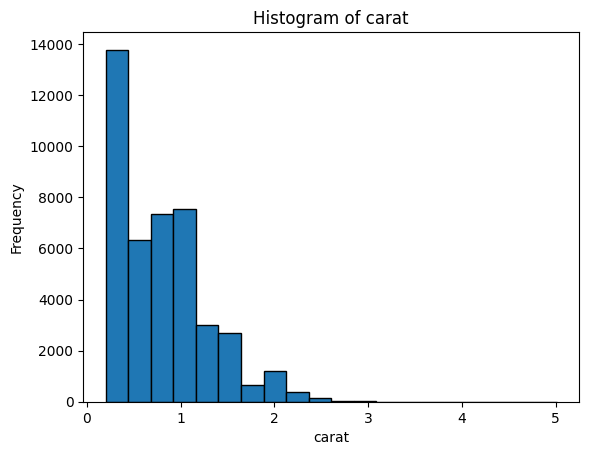

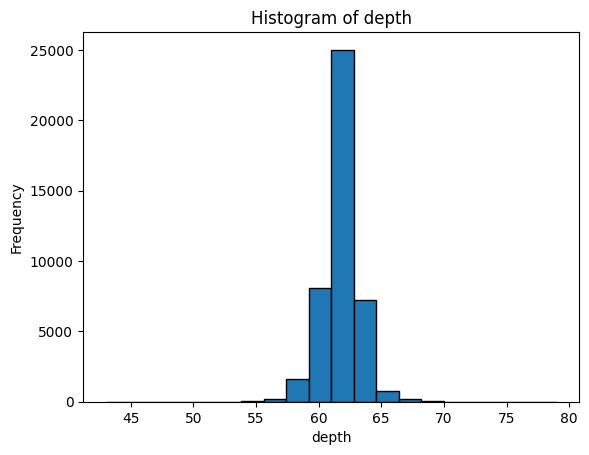

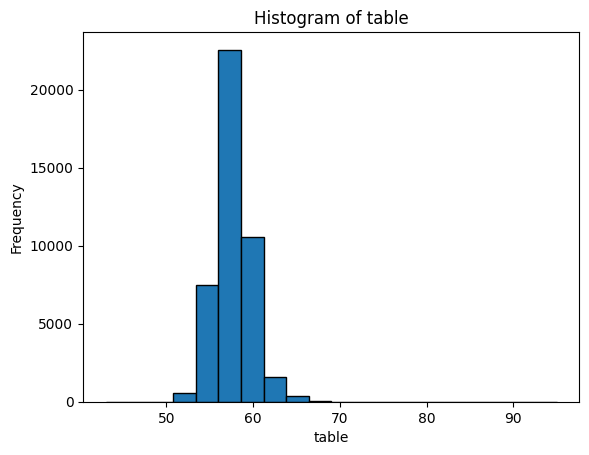

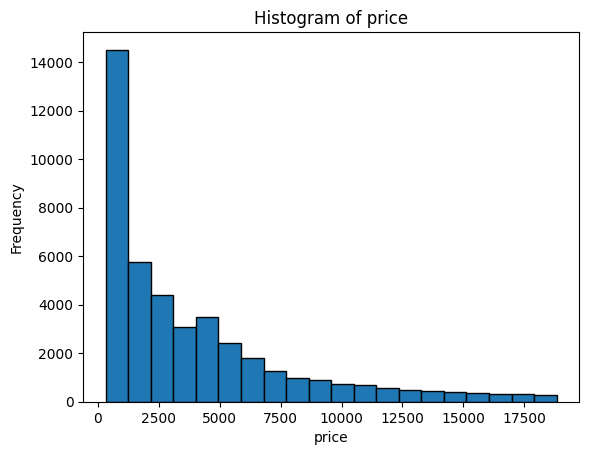

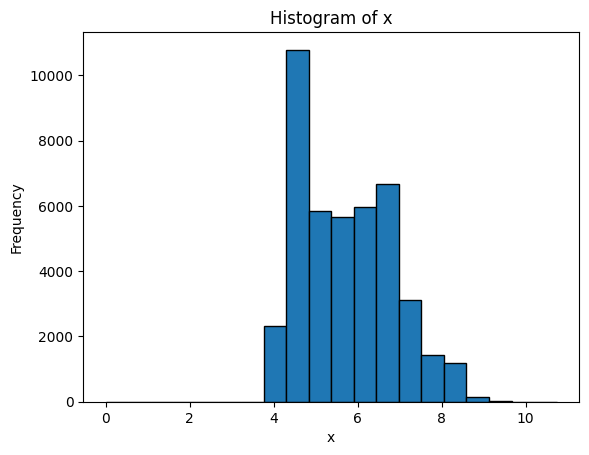

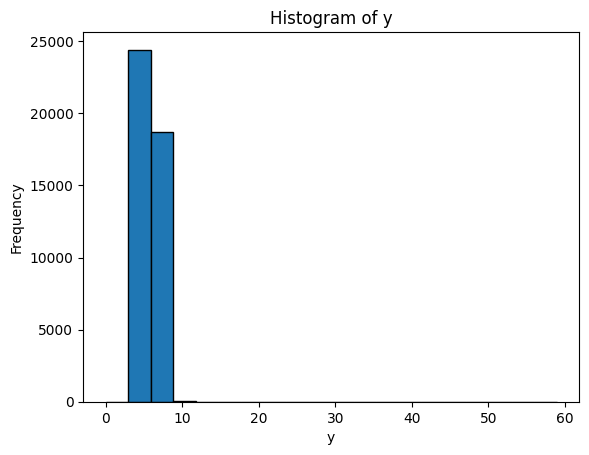

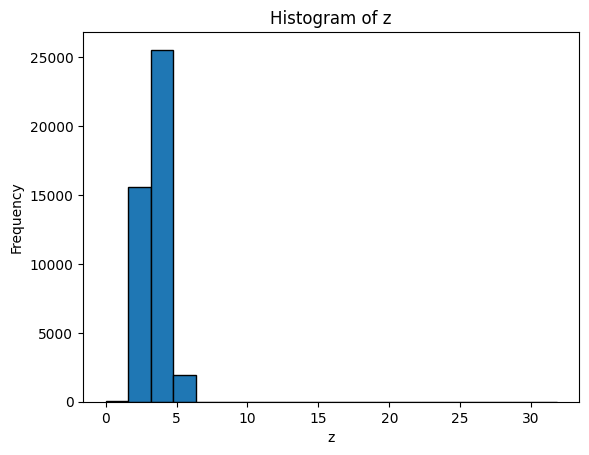

In [17]:
for i in train.columns:
  plt.hist(train[i], bins=20, edgecolor='black')

  # Adding labels and title
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {i}')

  # Display the histogram
  plt.show()

In [14]:
train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


<Axes: >

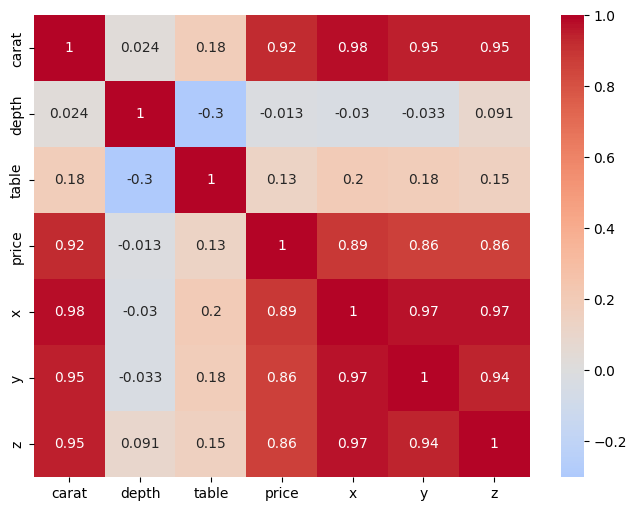

In [18]:
correlation_matrix = train.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

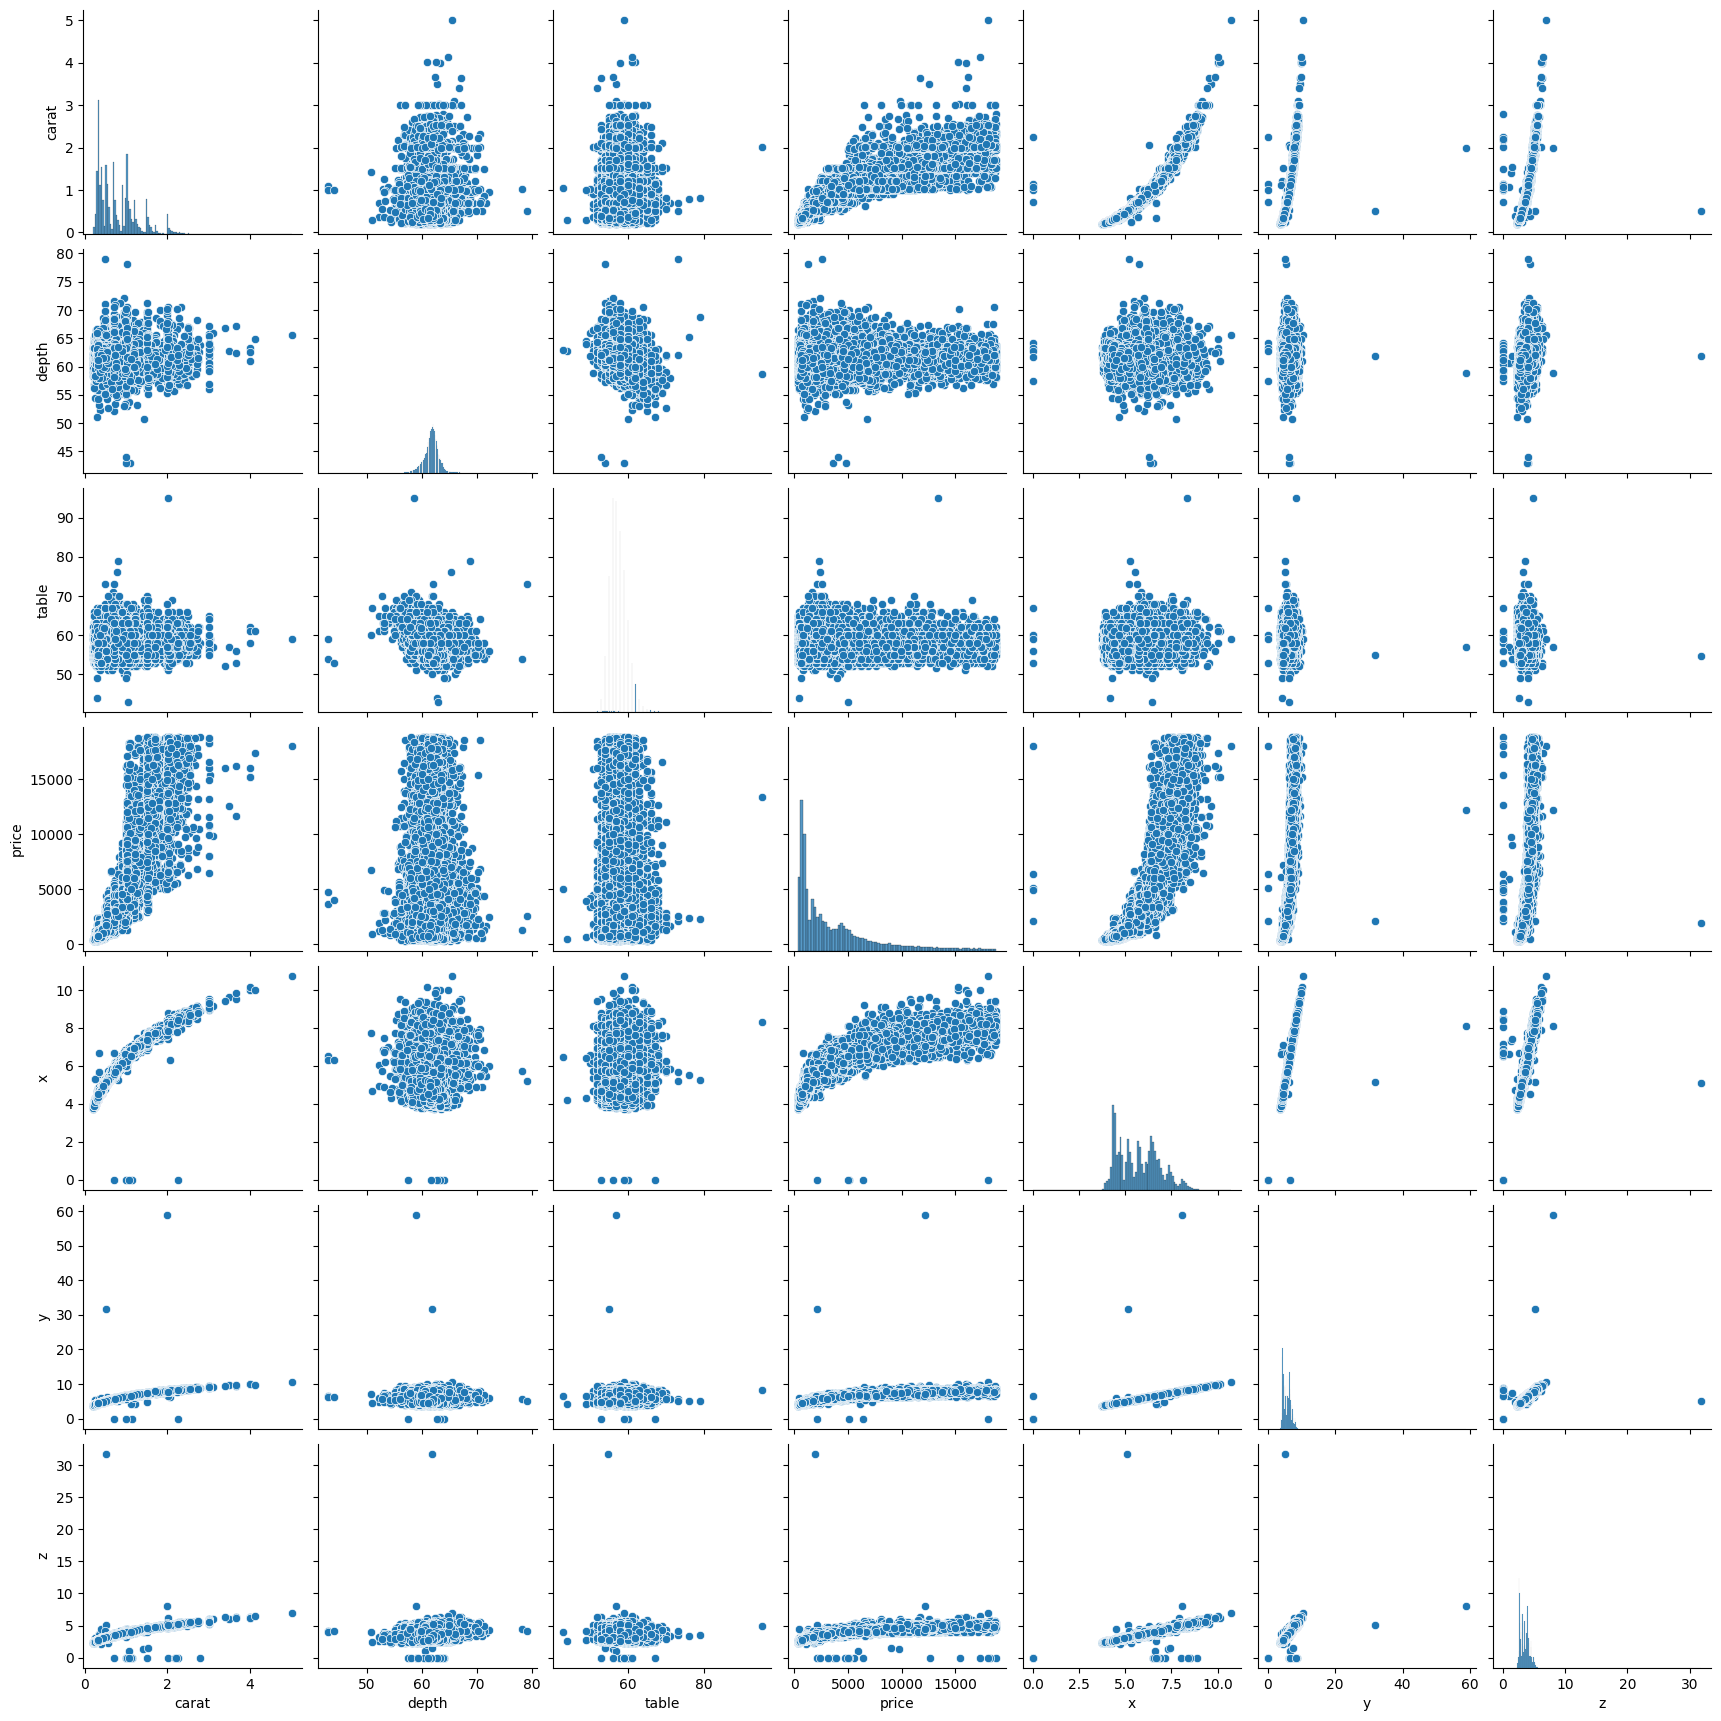

In [16]:
sns.pairplot(train)
plt.grid()
plt.show()

# Outliers check

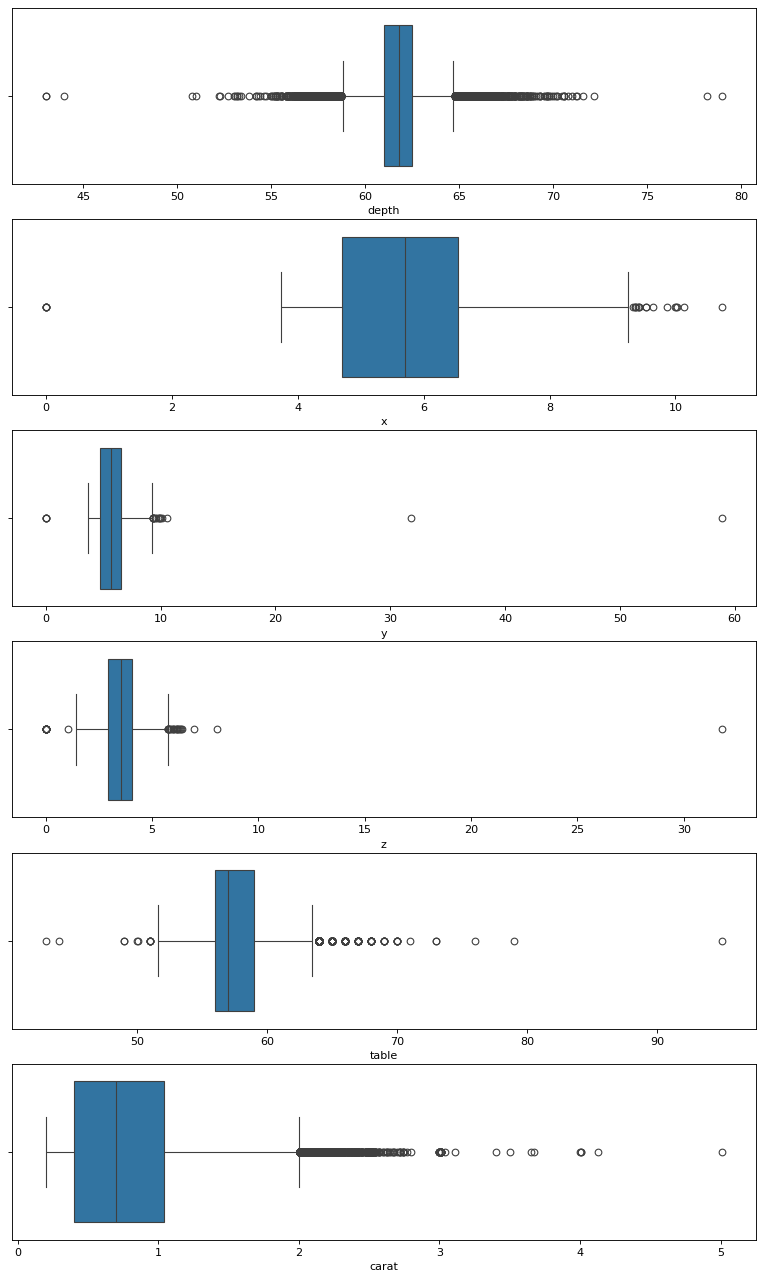

In [21]:
fig, axis = plt.subplots (6, figsize=(12,20), dpi=80)
x = train[['depth', 'x','y', 'z', 'table', 'carat']]
for i ,column in enumerate(x):
  sns.boxplot(x=train[column],ax = axis[i])


# Feature Engineering

In [29]:
train['volume'] = train['x'] * train['y'] * train['z']

# Feature Scaling

In [30]:
feature_scale=[feature for feature in train.columns if feature not in ['price']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])
train[feature_scale]=scaler.transform(train[feature_scale])
train.head()

,carat,depth,table,price,x,y,z
0,0.178794,0.522222,0.269231,4270,0.611732,0.112054,0.127987
1,0.272349,0.497222,0.288462,15164,0.687151,0.125976,0.141824
2,0.024948,0.508333,0.250000,828,0.412477,0.074873,0.085220
3,0.068607,0.505556,0.250000,1577,0.483240,0.088625,0.100314
4,0.103950,0.500000,0.269231,2596,0.536313,0.097114,0.110063


In [31]:
train = train.drop(train[train['x'] == 0].index)
train = train.drop(train[train['y'] == 0].index)
train = train.drop(train[train['z'] == 0].index)

In [32]:
num_features=['carat','depth','table','price','x','y','z']
for feature in num_features:
    train[feature]=np.log(train[feature])


train.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,carat,depth,table,price,x,y,z
0,-1.721520,-0.649662,-1.312186,8.359369,-0.491461,-2.188771,-2.055823
1,-1.300670,-0.698718,-1.243194,9.626679,-0.375201,-2.071662,-1.953169
2,-3.690961,-0.676618,-1.386294,6.719013,-0.885576,-2.591966,-2.462518
3,-2.679360,-0.682097,-1.386294,7.363280,-0.727241,-2.423344,-2.299445
4,-2.263844,-0.693147,-1.312186,7.861727,-0.623038,-2.331872,-2.206703


Data split

In [33]:
y=train['price']
x=train.drop(['price'],axis=1)
x.head()


,carat,depth,table,x,y,z
0,-1.721520,-0.649662,-1.312186,-0.491461,-2.188771,-2.055823
1,-1.300670,-0.698718,-1.243194,-0.375201,-2.071662,-1.953169
2,-3.690961,-0.676618,-1.386294,-0.885576,-2.591966,-2.462518
3,-2.679360,-0.682097,-1.386294,-0.727241,-2.423344,-2.299445
4,-2.263844,-0.693147,-1.312186,-0.623038,-2.331872,-2.206703


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Training

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train) #training the algorithm
print(LR.intercept_)
print(LR.coef_)

In [ ]:
y_pred=LR.predict(X_test)
data_result=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
data_result.head(10)

In [ ]:
print("accuracy: "+ str(LR.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)

result=model1.fit()

y_pred_ols=result.predict(X_test)

In [ ]:
data_result=pd.DataFrame({'Actual':y_pred_ols,'Predict':y_pred})
data_result

In [ ]:
print("accuracy: "+ str(LR.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_pred_ols,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_pred_ols,y_pred)))
R2 = r2_score(y_pred_ols,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

In [ ]:
price=LR.predict(test.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

In [ ]:
tree_pred=tree_model.predict(X_test)
tree_mse=mean_squared_error(y_test,tree_pred)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

In [ ]:
sum_df=pd.DataFrame(data={'existed':list(y_test),'outcome':tree_pred})
sum_df['accuracy']=abs(sum_df['outcome']/sum_df['existed'])
sum_df.loc[sum_df['accuracy']>1,'accuracy']=2-sum_df['accuracy']
sum_df['accuracy'].mean()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(n_estimators=100,random_state=40)
forest_model.fit(X_train,y_train)
forest_pred=forest_model.predict(X_train)
forest_mse=mean_squared_error(y_train,forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
p_d={
    'n_estimators':np.random.randint(1,200,10),
    'max_features':np.random.randint(1,8,10)
}
forest_mod=RandomForestRegressor(random_state=40)
random_search=RandomizedSearchCV(forest_mod,param_distributions=p_d,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=40)
random_search.fit(X_train,y_train)

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
sum_df=pd.DataFrame(data={'existed':list((y_train)),'outcome':forest_pred})
sum_df['accuracy']=abs(sum_df['outcome']/sum_df['existed'])
sum_df.loc[sum_df['accuracy']>1,'accuracy']=2-sum_df['accuracy']
accuracy_mean=sum_df['accuracy'].mean()
print(f"accuracy mean = {accuracy_mean}")
sum_df

In [ ]:
pricee=forest_model.predict(test.drop('Id',axis=1))
data={'ID':ID,'price':pricee}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

# Fine tuning

In [ ]:
test['approx_volume']=test['x']*test['y']*test['z']
test.drop(['depth','x','y','z'],axis=1,inplace=True)
test.head()